In [12]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
import numpy as np
import os

In [13]:
data_path = './train'

In [14]:
class_name = ['black','blue','brown','green','grey','orange','pink','purple','red','silver','white','yellow']
color_number = 3
def get_list_files(dirName):
    files_list = os.listdir(dirName)
    return files_list

file_lists_color = get_list_files(data_path+'/'+class_name[color_number])

In [15]:
len(file_lists_color)

704

In [16]:
def rand_img(file_lists_img):
    
    rand_img = np.random.randint(0,len(file_lists_img))
    img_dir = data_path + '/' + class_name[color_number] +'/' + file_lists_img[rand_img]
    print(img_dir)
    return img_dir

./train/green/121126691.jpg


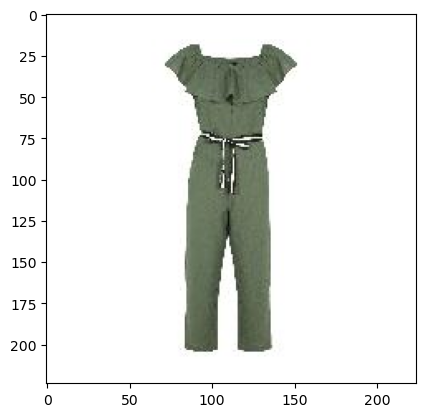

In [17]:
img = cv2.imread(rand_img(file_lists_color)) #BGR
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [18]:
# mask =img!=255
# print(mask)

In [19]:
def crop_img(img):
    mask = img!=255
    mask = mask.any(2)
    mask0, mask1 = mask.any(0), mask.any(1)
    colstart, colend = mask0.argmax(), len(mask0) - mask0[::-1].argmax()+1
    rowstart, rowend = mask1.argmax(), len(mask1) - mask1[::-1].argmax()+1
    return img[rowstart:rowend, colstart:colend]

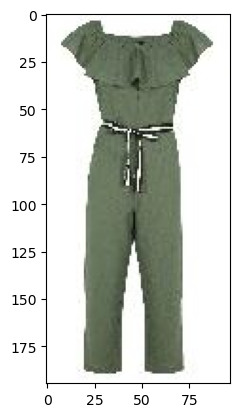

In [20]:
img_cr = crop_img(img)
plt.imshow(img_cr)
plt.show()

In [21]:
mask = img!=255
mask = mask.any(2)
mask0, mask1 = mask.any(0), mask.any(1)
print(mask0)
print(mask0.argmax())
print(len(mask0))
print(mask0[::-1].argmax())

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True  True  True  True False False False False Fa

In [22]:
# img[0]

In [23]:
def hsv_histogram(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     print(hsv)
    h = hsv[..., 0]
#     print(h)
    return np.bincount(h.ravel(), minlength=256)

./train/green/115249996.jpg
./train/green/115249996.jpg


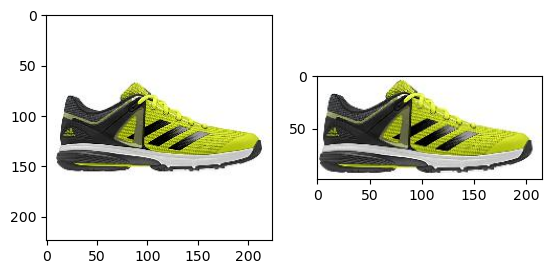

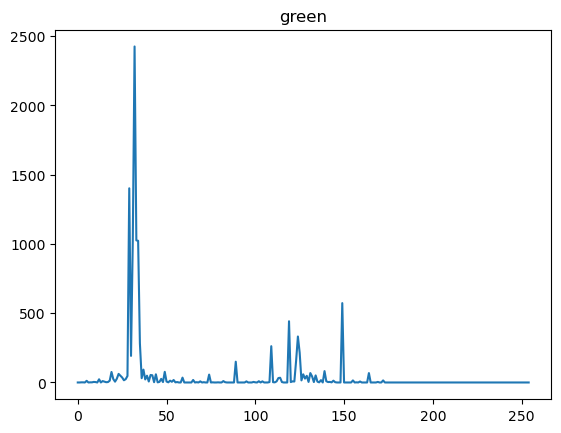

In [24]:
for i in range(1):
    fig,(ax1,ax2) = plt.subplots(1,2)
    rand_img_dir = rand_img(file_lists_color)
    print(rand_img_dir)
    imgBGR = cv2.imread(rand_img_dir)
    imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
    img_crop = crop_img(imgRGB)
    ax1.imshow(imgRGB)
    ax2.imshow(img_crop)
    plt.show()

hist = hsv_histogram(img_crop)
plt.plot(hist[1:])
plt.title(class_name[color_number])
plt.show()

In [25]:
# print(hist)

In [26]:
target = []
images = []
flat_data = [] 

for catagory in class_name:
    
    class_num = class_name.index(catagory) #label encoding value
    path = os.path.join(data_path,catagory)

    for img in os.listdir(path):
        imgBGR = cv2.imread(os.path.join(path,img))
        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
        
        img_crop = crop_img(imgRGB)
        
        hist256 = hsv_histogram(img_crop)
        hist = hist256[1:]
        
        flat_data.append(hist.flatten())
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)


In [27]:
print(len(flat_data))
print(len(target))

6239
6239


In [28]:
target

array([ 0,  0,  0, ..., 11, 11, 11])

<BarContainer object of 12 artists>

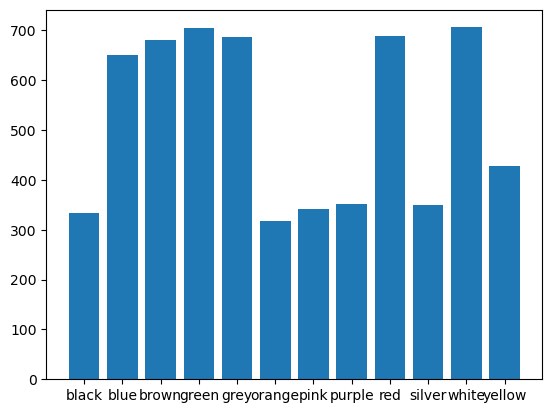

In [29]:
unique,count = np.unique(target,return_counts=True)
plt.bar(class_name,count)

In [30]:
#split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data,target,test_size=0.3)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_pred = model1.predict(x_test)

In [33]:
model1.score(x_test,y_test)

0.6330128205128205

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
model2 = BaggingClassifier()
model2.fit(x_train,y_train)

BaggingClassifier()

In [35]:
y_pred2= model2.predict(x_test)

In [36]:
model2.score(x_test,y_test)

0.6009615384615384

In [37]:
model3 = KNeighborsClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
model3.score(x_test,y_test)

0.5592948717948718

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
model4 = ExtraTreesClassifier()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
model4.score(x_test,y_test)

0.6436965811965812